In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [2]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)
print(x_train.dtype, y_train.dtype)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)
uint8 uint8


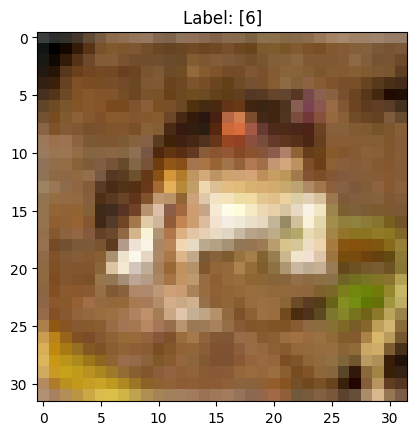

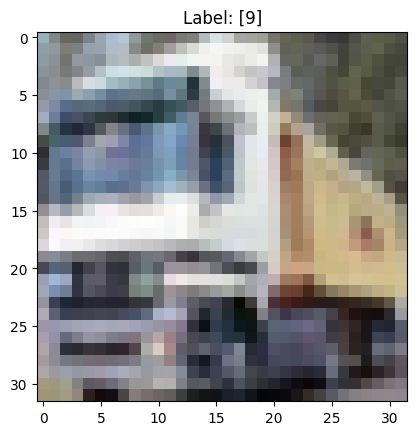

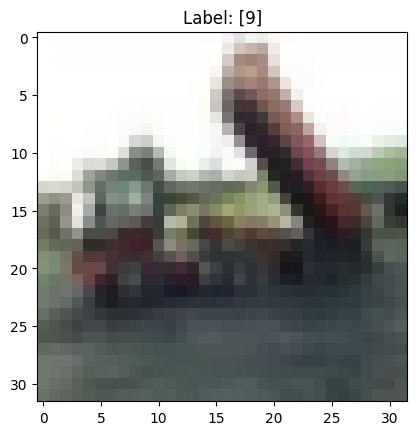

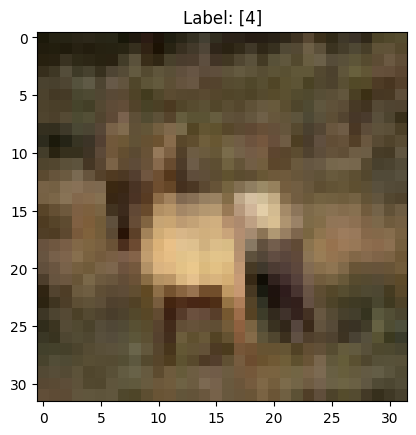

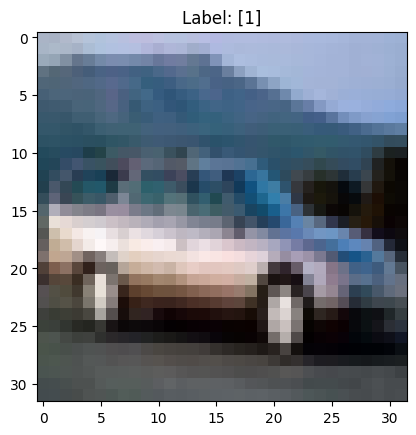

In [3]:
# Plot first 5 images in the training set
for i in range(5):
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.show()

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [5]:
# Split the training data further into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [6]:
# Build the FCNN model
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Flatten the 32x32x3 image
    layers.Dense(512, activation='relu'),    # Dense hidden layer
    layers.Dense(10, activation='softmax')   # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
 #Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.2616 - loss: 2.2307 - val_accuracy: 0.3431 - val_loss: 1.8355
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.3742 - loss: 1.7644 - val_accuracy: 0.3807 - val_loss: 1.7376
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.4014 - loss: 1.6716 - val_accuracy: 0.3995 - val_loss: 1.6539
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.4292 - loss: 1.6100 - val_accuracy: 0.4197 - val_loss: 1.6245
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.4408 - loss: 1.5745 - val_accuracy: 0.4347 - val_loss: 1.6012
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.4484 - loss: 1.5519 - val_accuracy: 0.4464 - val_loss: 1.5586
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.4516 - loss: 1.5391 - val_accuracy: 0.4532 - val_loss: 1.5450
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.4670 - loss: 1.5128 - 

In [9]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4496 - loss: 1.5468
Test accuracy: 0.44679999351501465


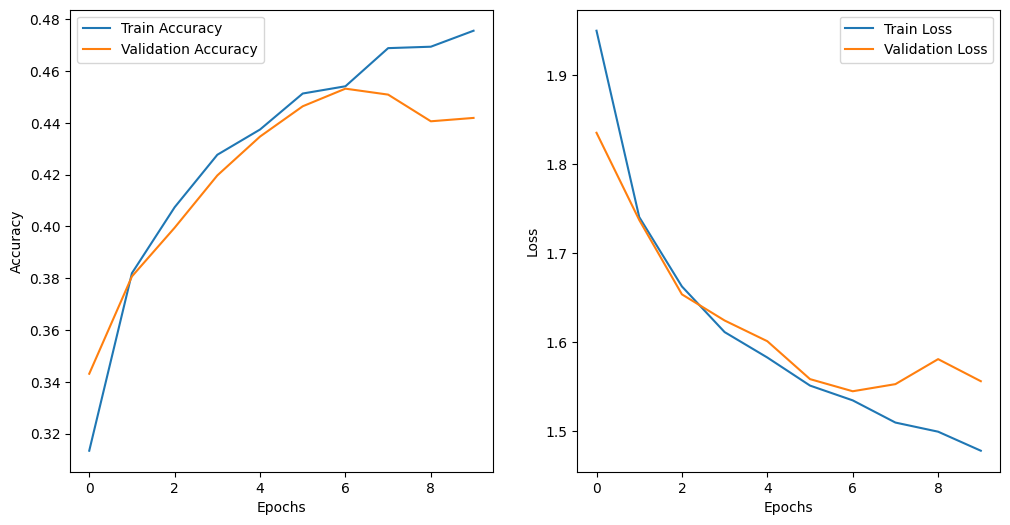

In [11]:
#Plot Train/Test Accuracy and Loss
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), #Experiment with Learning Rate and Batch Size
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.4820 - loss: 1.4496 - val_accuracy: 0.4625 - val_loss: 1.5198
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.4953 - loss: 1.4293 - val_accuracy: 0.4657 - val_loss: 1.5081
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.5003 - loss: 1.4193 - val_accuracy: 0.4633 - val_loss: 1.4946
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.5039 - loss: 1.4078 - val_accuracy: 0.4666 - val_loss: 1.5048
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5028 - loss: 1.3970 - val_accuracy: 0.4685 - val_loss: 1.4953
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.5086 - loss: 1.3906 - val_accuracy: 0.4798 - val_loss: 1.4808
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.5093 - loss: 1.3833 - val_accuracy: 0.4674 - val_loss: 1.5258
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.5088 - loss: 1.3827 - 